# 🔭 Project: Analysis of Habitable Exoplanets

## ✨ Introduction

The exploration of the universe and the search for planets beyond our solar system is one of the most fascinating fields of modern science. As an astronomy enthusiast, I have always been captivated by the idea that somewhere in the cosmos there may be worlds yet to be discovered, potentially habitable or even terraformed in the future. This project arises from that curiosity and the desire to contribute, through data analysis, to the human dream of **exploring and conquering new worlds**.

Thanks to missions like **Kepler**, **TESS**, and other scientific initiatives, thousands of exoplanets have been discovered. These celestial bodies have been recorded with detailed data on their size, mass, temperature, distance from their stars, and more. By analyzing this information, it is possible to classify, visualize, and prioritize those worlds that appear most promising for future observation, exploration, or even colonization missions.

---

## 🎯 Project Objectives

This notebook aims to perform an exploratory data analysis (EDA) focused on the habitability of exoplanets. In particular, it will seek to:

- Identify planets that lie within the **habitable zone**, based on their equilibrium temperature.  
- Filter and analyze planets with **Earth-like characteristics**, such as mass and radius.  
- Study the **distribution of distances** from Earth to discovered planets, to highlight which are closest and would be accessible candidates for future missions.

---

## 📚 About the Dataset

The data used comes from the **NASA Exoplanet Archive**, a public repository of data collected by space missions, ground-based observatories, and scientific studies. In this case, we use the main catalog known as the **Planetary Systems (PS) Table**, which contains standardized information on thousands of confirmed exoplanets.

Some of the most relevant variables in this dataset include:

- `pl_name`: planet name  
- `pl_rade`: planet radius (in Earth radii)  
- `pl_bmasse`: planet mass (in Earth masses)  
- `pl_eqt`: planet equilibrium temperature (in Kelvin)  
- `st_teff`: host star temperature  
- `sy_dist`: distance from the planetary system to Earth (in parsecs)  

The dataset is in CSV format and is accessed directly via a URL that queries the file’s TAP (Table Access Protocol) system. This ensures the information is **up-to-date and complete** at the time of analysis.

---

## 🛠️ Tools Used

To carry out this analysis, we use Python data-science ecosystem tools such as:  
- **Pandas** for tabular data manipulation and analysis  
- **NumPy** for numerical computations  
- **Matplotlib** and **Seaborn** for data visualization  
---



## Import Python Modules


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

sns.set(style="whitegrid")


## Loading the Data

In [5]:
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv"
df = pd.read_csv(url)


/tmp/ipython-input-5-3847925641.py:2: DtypeWarning: Columns (3,4,50,65,153,183,187,206,211,257) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


### Data Characteristics

In [6]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (38509, 354)


## Explore the Data

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,rastr,dec,decstr,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbperstr,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblperlim,pl_orblperstr,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbinclstr,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtperstr,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenstr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtstr,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepstr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolstr,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densstr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepstr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidstr,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurstr,sy_kmagstr,sy_umag,sy_umagerr1,sy_umagerr2,sy_umagstr,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmagstr,sy_imag,sy_imagerr1,sy_imagerr2,sy_imagstr,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmagstr,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1magstr,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2magstr,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3magstr,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4magstr,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmagstr,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamagstr,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmagstr,pl_controv_flag,pl_tsystemref,st_metratio,st_spectype,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmagstr,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_rotpstr,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_projobliqstr,x,y,z,htm20,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampstr,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radjstr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radestr,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_ratrorstr,pl_ratdor,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,pl_trueobliqstr,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_icmagstr,rowupdate,pl_pubdate,st_refname,releasedate,dkin_flag,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratdorstr,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparstr,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_cmassjstr,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassestr,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_massjstr,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massestr,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassjstr,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassestr,pl_bmassprov,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinijstr,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msiniestr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffstr,st_met,st_meterr1,st_meterr2,st_metlim,st_metstr,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvstr,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_vsinstr,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumstr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggstr,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agestr,st_mass,st_masserr1,st_masserr2,st_masslim,st_massstr,st_dens,st_denserr1,st_denserr2,st_denslim,st_densstr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radstr,ttv_flag,ptv_flag,tran_flag,rv_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,pul_flag,soltype,sy_snum,sy_pnum,sy_mnum,cb_flag,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec,pl_nnotes,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmstr,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_pmdecstr,sy_plx,sy_plxerr1,sy_plxerr2,sy_plxstr,sy_dist,sy_disterr1,sy_disterr2,sy_diststr,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_bmagstr,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_vmagstr,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_

In [8]:
print(f"number of exoplanets:{df.pl_name.nunique()}")

number of exoplanets:5926


### Información basica del dataset y sus tipos de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38509 entries, 0 to 38508
Columns: 354 entries, pl_name to sy_kmagerr2
dtypes: float64(239), int64(26), object(89)
memory usage: 104.0+ MB


### Datos Estadisticos

In [10]:
df.describe()

,default_flag,disc_year,ra,dec,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,sy_umag,sy_umagerr1,sy_umagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,pl_controv_flag,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmagstr,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,x,y,z,htm20,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_ratdor,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,sy_icmag,sy_icmagerr1,sy_icmagerr2,dkin_flag,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_met,st_meterr1,st_meterr2,st_metlim,st_radv,st_radverr1,st_radverr2,st_radvlim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_mass,st_masserr1,st_masserr2,st_masslim,st_dens,st_denserr1,st_denserr2,st_denslim,st_rad,st_raderr1,st_raderr2,st_radlim,ttv_flag,ptv_flag,tran_flag,rv_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,pul_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec,pl_nnotes,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_dist,sy_disterr1,sy_disterr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2
count,38509.000000,38509.000000,38509.000000,38509.000000,38509.000000,38509.000000,38509.000000,38509.000000,3.529800e+04,3.375200e+04,3.375100e+04,35298.000000,3004.000000,3391.000000,3004.000000,19249.0,21685.000000,7221.000000,7220.000000,24471.000000,17096.000000,3861.000000,3863.000000,19839.000000,1.721000e+03,1663.000000,1663.000000,1721.0,18499.000000,3583.000000,3582.000000,21242.000000,16827.000000,2287.000000,2287.000000,19570.000000,46.000000,43.000000,43.000000,46.000000,16834.000000,15609.000000,15609.000000,21892.0,2520.000000,2403.000000,2403.000000,2520.000000,17883.000000,13304.000000,13304.000000,20626.000000,3.008700e+04,29607.000000,29607.000000,30087.0,21984.000000,17396.000000,17395.000000,24718.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,35835.000000,35741.000000,35741.000000,35836.000000,35756.000000,35756.000000,35834.000000,26297.000000,26297.000000,358

### Valores faltantes



In [11]:
df[['pl_name', 'pl_rade', 'pl_bmasse', 'pl_eqt', 'sy_dist']].isnull().sum()

,0
pl_name,0
pl_rade,11955
pl_bmasse,31834
pl_eqt,21682
sy_dist,840


## Analysis 1: - Planet Density
> This is one of the most important visualizations in exoplanet science.  
> The mass–radius relationship lets you calculate a planet’s density,  
> which in turn gives a key hint about its composition.

Calculate each planet’s **density** ($\rho$) using:

$$
\rho = \frac{M}{V}
$$

where:
- $M$ is the planet’s mass  
- $V$ is the planet’s volume

The volume of a sphere is given by:

$$
V = \frac{4}{3}\,\pi\,r^{3}
$$

where:
- $r$ is the planet’s radius  
- $\pi$ (pi) is the mathematical constant $\approx 3.14159$

---

#### Variables & Constants

- **$\rho$** (rho): density (kg/m³)  
- **$M$**: mass (kg)  
- **$V$**: volume (m³)  
- **$r$**: radius (m)  
- **$\pi$**: 3.14159…

---

### Why use a logarithmic scale for planetary density?

- **Wide range of values**  
  Planet densities span from a few hundred to several thousand kg/m³. A log scale compresses this range so all data can be viewed together.

- **Proportional comparison**  
  On a log scale, a 10× increase in density always occupies the same distance on the axis, making relative differences (e.g., 500 vs. 5000 kg/m³) easier to interpret.

- **Visual balance**  
  Without a log scale, high-density points dominate the plot and low-density points cluster near the axis. Log scaling spreads values more evenly.

---

### Plot Explanation

This scatter plot visualizes the relationship between exoplanet mass and radius, both on logarithmic scales:

- **X-axis (Radius)**: Planetary radius in Earth radii, log scale.  
- **Y-axis (Mass)**: Planetary mass in Earth masses, log scale.  
- **Marker color & size**: Both map to the planet’s density (kg/m³) using a continuous “viridis” colormap and a log normalization.  
- **Colorbar**: Shows how density varies from low (purple/blue) to high (yellow).

**Key insights**  
- There is a clear positive trend: more massive planets generally have larger radii.  
- **Low-density** objects (purple/blue) tend to cluster at larger radii for their mass—characteristic of gas giants.  
- **High-density** objects (green/yellow) appear toward smaller radii for a given mass—indicative of rocky or iron-rich planets.  
- The log–log scaling compresses the wide range of values, making patterns visible across orders of magnitude in both mass and radius.



Se analizarán 2928 planetas con datos completos de masa y radio.


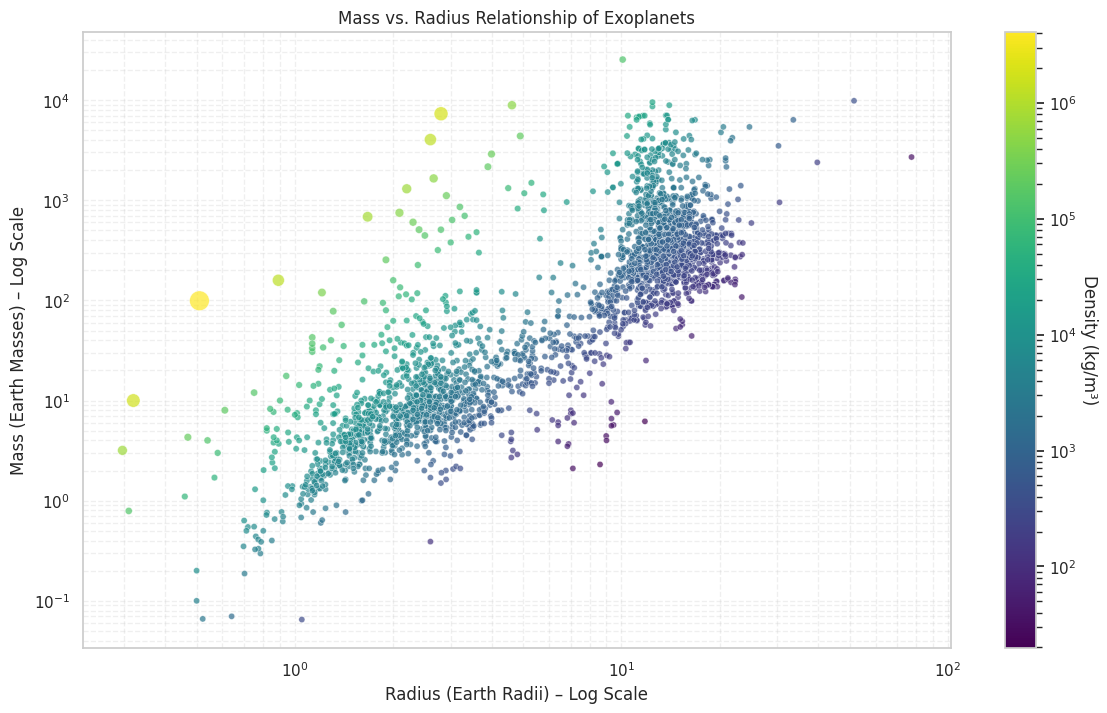

In [20]:
# Constants for consistency (kg and m)
EARTH_MASS_KG = 5.972e24      # mass of Earth in kilograms
EARTH_RADIUS_M = 6.371e6      # radius of Earth in meters
PI = np.pi

# Drop rows where mass or radius is missing to ensure plot integrity
df_plot = df.dropna(subset=['pl_masse', 'pl_rade']).copy()

print(f"Se analizarán {len(df_plot)} planetas con datos completos de masa y radio.")

# Convert masses and radii from Earth units to SI units
df_plot['mass_kg']   = df_plot['pl_masse'] * EARTH_MASS_KG
df_plot['radius_m']  = df_plot['pl_rade']  * EARTH_RADIUS_M

# Calculate volume (m³) and then density (kg/m³)
df_plot['volume_m3']      = (4/3) * PI * (df_plot['radius_m'] ** 3)
df_plot['density_kg_m3']  = df_plot['mass_kg'] / df_plot['volume_m3']

# Prepare a log-norm and size mapping
norm = mcolors.LogNorm(vmin=df_plot['density_kg_m3'].min(),
                       vmax=df_plot['density_kg_m3'].max())

# size scale in points²
size_min, size_max = 20, 200
dens = df_plot['density_kg_m3']
sizes = (dens - dens.min()) / (dens.max() - dens.min())  # 0–1
sizes = sizes * (size_max - size_min) + size_min

# Create Figure & Axes
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xscale('log')
ax.set_yscale('log')

# Draw Seaborn scatter onto our ax, without legend
sns.scatterplot(
    data=df_plot,              # <--- Usando df_plot
    x='pl_rade',               # Radius in Earth radii
    y='pl_masse',              # Mass in Earth masses
    hue='density_kg_m3',
    palette='viridis',
    hue_norm=norm,             # apply log-norm
    size=sizes,                # our custom size array
    sizes=(size_min, size_max),
    alpha=0.7,
    legend=False,
    ax=ax
)

# Add a continuous colorbar tied to that same Axes
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array(df_plot['density_kg_m3'])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Density (kg/m³)', rotation=270, labelpad=15)

# Final styling
ax.set_title('Mass vs. Radius Relationship of Exoplanets')
ax.set_xlabel('Radius (Earth Radii) – Log Scale')
ax.set_ylabel('Mass (Earth Masses) – Log Scale')
ax.grid(True, which='both', ls='--', alpha=0.3)

plt.show()

## Analysis 2: Planets in the habitable zone

### Analysis Overview
1. **Habitable Zone Filtering**  
   - We define the “habitable zone” as planets with equilibrium temperatures between 180 K and 310 K.  
   - We count how many planets have a valid temperature measurement and how many of those fall into that temperature window.  
   - We then calculate what percentage of all measured planets lie in this zone.

2. **Rocky Candidate Selection**  
   - Within the habitable zone, we further filter for planets whose density exceeds 3000 kg/m³ (i.e. likely rocky).  
   - We print out these top rocky candidates (name, temperature, radius, density).

3. **Visualization Preparation**  
   - We drop any rows missing temperature, radius or density so our plot only uses complete data.  
   - We annotate each planet as either “Best Candidate” (habitable & rocky) or “Other Planets” for coloring in the scatter plot.

---

### Scales Used
- **X-axis: Equilibrium Temperature (K)**  
  - **Linear scale** from ~100 K up to ~1000 K—allows a straightforward reading of planetary temperatures.
- **Y-axis: Planetary Radius (Earth Radii)**  
  - **Logarithmic scale**: radii span fractions of an Earth radius up to tens of Earth radii.  
  - Log scaling compresses large values and expands small ones, making both small rocky worlds and large gas giants visible on the same axis.

---

### Plot Interpretation
- **Red points (“Best Candidate”)**  
  - Planets that sit in the habitable temperature range **and** have densities > 3000 kg/m³: prime rocky-habitable candidates.
- **Gray points (“Other Planets”)**  
  - All other planets—either outside the habitable temperature window or with low densities (likely gas-rich).
- **Shaded green region**  
  - Marks the 180 K–310 K habitable temperature band across the entire radius range.
- **Key takeaways**  
  - Rocky, Earth-like planets in the habitable zone appear clearly as red dots within the shaded band.  
  - The log-scaled radius axis highlights how small, dense, rocky candidates differ visually from larger, low-density gas giants.


Out of 16827 planets with temperature data, 539 are in the habitable zone.
This represents only 3.20% of the total measured.
We found 22 candidate rocky planets in the habitable zone!
Here are our top candidates:
                pl_name  pl_eqt    pl_rade  density_kg_m3
4959             K2-3 d  305.20   1.458000    3913.438231
5201            K2-18 b  284.00   2.370000    3694.266237
5207            K2-18 b  235.00   2.380000    3255.296649
5558       TRAPPIST-1 d  288.00   0.772000    4912.927216
6085       TRAPPIST-1 e  251.30   0.918000    4418.471117
6090       TRAPPIST-1 f  219.00   1.045000    3285.249939
6095       TRAPPIST-1 g  198.60   1.127000    5161.089908
6195         LHS 1140 b  230.00   1.430000   12537.816444
6197         LHS 1140 b  226.00   1.730000    5962.907771
6198         LHS 1140 b  235.00   1.727000    7471.138448
7381   EPIC 248847494 b  183.00  12.441990   11827.067375
8798         TOI-2285 b  284.00   1.740000   20407.755432
10516        TOI-2088 b  300.33  

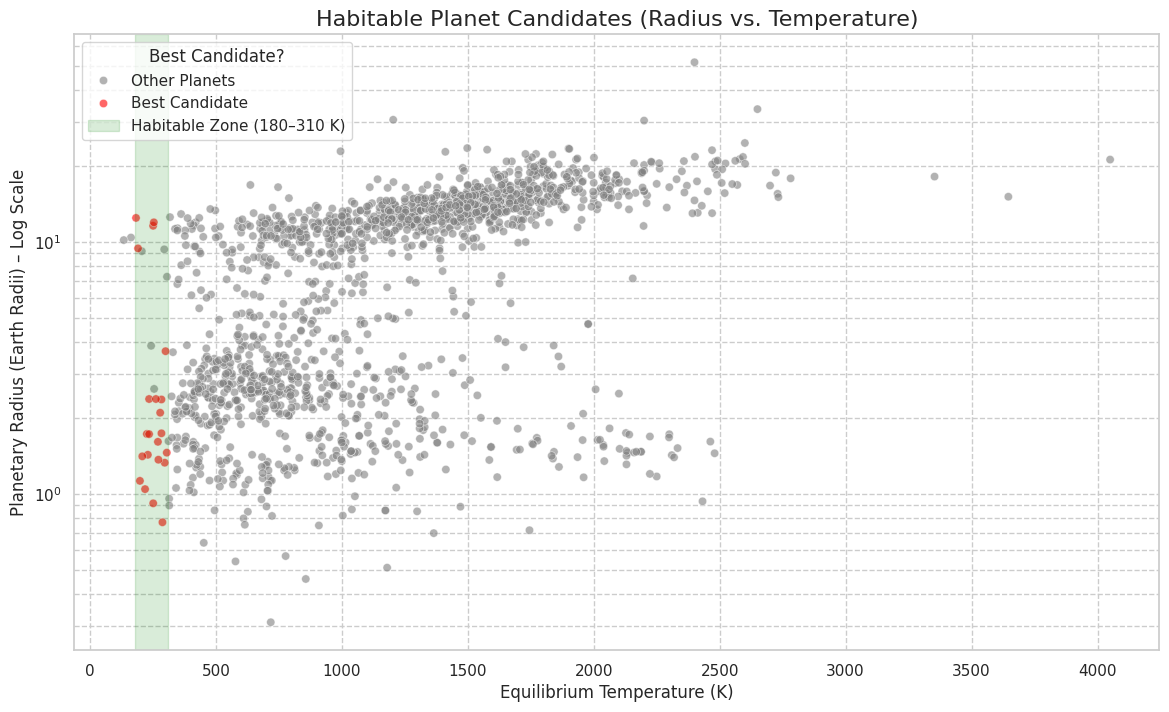

In [13]:
# Filter planets in the habitable zone
habitable_zone = df[(df['pl_eqt'] >= 180) & (df['pl_eqt'] <= 310)]

# Count planets with temperature data
planets_with_temp = df['pl_eqt'].dropna()
total_with_temp = len(planets_with_temp)

# Count planets in the habitable zone
habitable_planets_count = len(habitable_zone)

# Calculate the percentage
percentage_habitable = (habitable_planets_count / total_with_temp) * 100

print(f"Out of {total_with_temp} planets with temperature data, {habitable_planets_count} are in the habitable zone.")
print(f"This represents only {percentage_habitable:.2f}% of the total measured.")

# Filter for rocky planets in the habitable zone (density > 3000 kg/m³)
rocky_habitable_zone = habitable_zone[habitable_zone['density_kg_m3'] > 3000]

print(f"We found {len(rocky_habitable_zone)} candidate rocky planets in the habitable zone!")
print("Here are our top candidates:")
print(rocky_habitable_zone[['pl_name', 'pl_eqt', 'pl_rade', 'density_kg_m3']])

# 1. Prepare data
df_clean = df.dropna(subset=['pl_eqt', 'pl_rade', 'density_kg_m3']).copy()
df_clean['is_candidate'] = (
    (df_clean['pl_eqt'] >= 180) &
    (df_clean['pl_eqt'] <= 310) &
    (df_clean['density_kg_m3'] > 3000)
)
# Map to human-readable labels
df_clean['Candidate Status'] = df_clean['is_candidate'].map({
    True:  'Best Candidate',
    False: 'Other Planets'
})

# 2. Plot
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(
    data=df_clean,
    x='pl_eqt',
    y='pl_rade',
    hue='Candidate Status',
    palette={'Best Candidate':'red', 'Other Planets':'gray'},
    alpha=0.6
)

# Shade the habitable zone
ax.axvspan(180, 310, color='green', alpha=0.15, label='Habitable Zone (180–310 K)')

# Styling
plt.yscale('log')
plt.title('Habitable Planet Candidates (Radius vs. Temperature)', fontsize=16)
plt.xlabel('Equilibrium Temperature (K)', fontsize=12)
plt.ylabel('Planetary Radius (Earth Radii) – Log Scale', fontsize=12)

# Place legend and give it a title
plt.legend(title='Status', loc='upper left')
plt.grid(True, which='both', ls='--')

# Final styling
plt.yscale('log')  # Use log scale for radius to accommodate wide range
plt.title('Habitable Planet Candidates (Radius vs. Temperature)', fontsize=16)
plt.xlabel('Equilibrium Temperature (K)', fontsize=12)
plt.ylabel('Planetary Radius (Earth Radii) – Log Scale', fontsize=12)
plt.legend(title='Best Candidate?', loc='upper left')
plt.grid(True, which='both', ls='--')
plt.show()


## Analysis 3: Earth-like planets

1. **Data Preparation**  
   - We drop any planets missing radius (`pl_rade`) or mass (`pl_bmasse`) to ensure we only compute ESI where both inputs are present.  
   - This leaves us with a clean DataFrame, `df_esi`, containing only complete cases.

2. **ESI Calculation**

  We compute two sub-scores:

  **1. Radius score**  
  $$
  \displaystyle \text{score_rade} \;=\; 1 \;-\; \bigl|\;\text{pl_rade} - 1\;\bigr|
  $$  
  —Equals 1 when radius = 1 RE; decreases linearly as it deviates.

  **2. Mass score**  
  $$
  \displaystyle \text{score_bmasse} \;=\; 1 \;-\; \bigl|\;\text{pl_bmasse} - 1\;\bigr|
  $$  
  —Equals 1 when mass = 1 ME; decreases linearly as it deviates.


3. **Combined ESI score**  
  $$
  \displaystyle \text{esi_score} \;=\; \frac{\text{score_rade} + \text{score_bmasse}}{2}
  $$  
  We then clip any negative values to zero, yielding a final index in the range **[0, 1]**  
  – 0 means “no similarity to Earth”  
  – 1 means “identical to Earth” in both mass and radius

---

### What is the Earth Similarity Index (ESI)?

The **Earth Similarity Index** is a simple, normalized metric designed to quantify how closely an exoplanet’s basic physical properties match those of Earth. It serves as a first-pass habitability proxy by focusing on two widely available measurements: radius and mass.

- **Purpose**  
  To rapidly identify exoplanets whose bulk characteristics (size and mass) fall near Earth’s values, flagging them as promising targets for more detailed habitability studies.

- **Key Features**  
  - **Unit-less scale from 0 to 1**:  
    - **1.0** = identical to Earth in the chosen property.  
    - **0.0** = maximally different.  
  - **Uses readily measured observables**: radius (pl_rade) and mass (pl_bmasse).  
  - **Combines multiple dimensions** into a single score by averaging individual sub-scores.

- **Why it matters**  
  - While it doesn’t account for atmosphere, temperature, or geochemistry, ESI provides a clear, data-driven filter to narrow down thousands of candidates to the handful most similar to Earth’s size and mass—ideal for prioritizing observational resources.

### Scales Used  
- **X-axis (ESI Score)**  
  - Linear scale from 0 to 1, where 1 means perfect similarity to Earth in both radius and mass.  
- **Y-axis (Planet Name)**  
  - Categorical axis listing the top 10 planets, ordered by decreasing similarity.  
- **Color**  
  - The `viridis` palette is used purely for visual differentiation of bars; it does not encode additional data beyond the ESI score already on the X-axis.

---

### Chart Interpretation  
- **Bar Length**  
  - Represents how close each planet’s size and mass are to Earth’s. Longer bars (closer to 1) indicate stronger Earth similarity.  
- **Top Candidates**  
  - The planet at the top of the chart has the highest combined mass-radius similarity.  
- **Comparative Insight**  
  - You can quickly see which worlds are nearest to Earth in bulk properties, and the relative gaps between them.  
- **Use Case**  
  - This ESI-based ranking helps prioritize targets for follow-up observations or habitability studies by focusing on planets whose mass and radius most closely match Earth’s.  


Calculating ESI for 3023 planets with complete data.


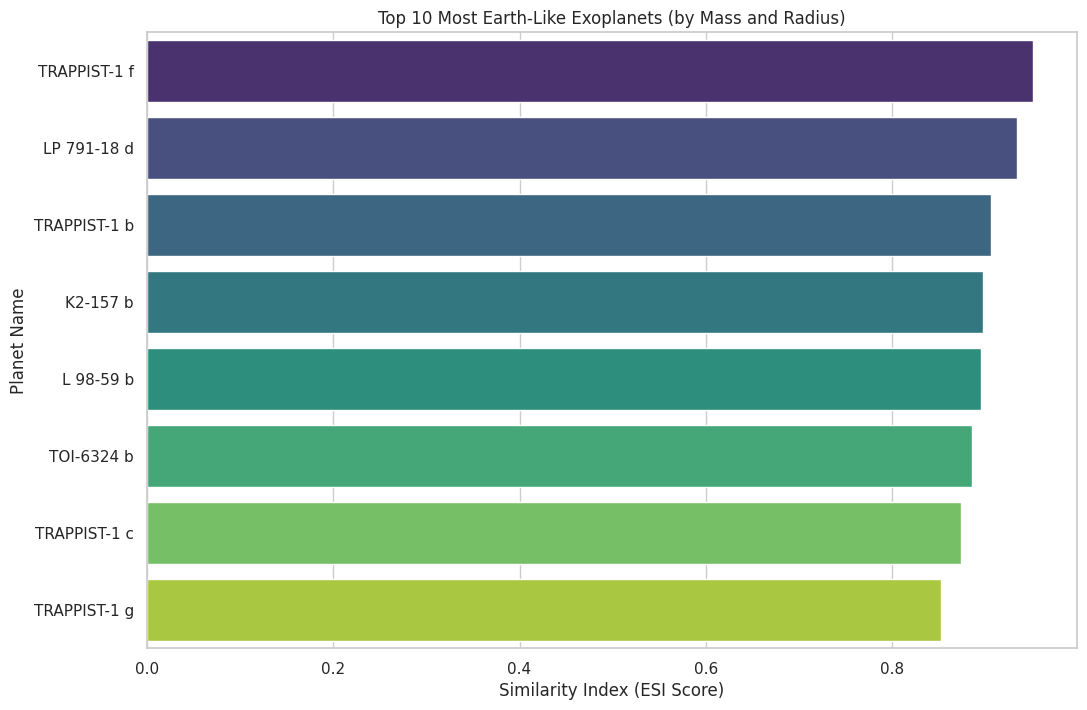

In [26]:
# We drop rows where mass or radius data is missing.
df_esi = df.dropna(subset=['pl_rade', 'pl_bmasse']).copy()
print(f"Calculating ESI for {len(df_esi)} planets with complete data.")

# Calculate the simplified Earth Similarity Index (ESI).
df_esi['score_rade'] = 1 - abs(df_esi['pl_rade'] - 1)
df_esi['score_bmasse'] = 1 - abs(df_esi['pl_bmasse'] - 1)

# The radius and mass scores are averaged.
df_esi['esi_score'] = (df_esi['score_rade'] + df_esi['score_bmasse']) / 2
df_esi['esi_score'] = df_esi['esi_score'].clip(lower=0)

# Get the top 10 most similar planets.
top_earth_like_planets = df_esi.sort_values(by='esi_score', ascending=False).head(10)

# Create the bar plot.
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_earth_like_planets,
    x='esi_score',
    y='pl_name',
    hue='pl_name',
    palette='viridis',
    errorbar=None
)
plt.title('Top 10 Most Earth-Like Exoplanets (by Mass and Radius)')
plt.xlabel('Similarity Index (ESI Score)')
plt.ylabel('Planet Name')
plt.show()


## Analysis 4: Distance to Earth
1. **Data Preparation**  
   - We drop any planets with missing distance (`sy_dist`) to work with a complete sample.  
   - We add a new column, `sy_dist_log10 = log10(sy_dist)`, so we can compare the raw and log-transformed distributions.  
   - We print descriptive statistics (`.describe()`) to get mean, median, quartiles, etc.

2. **Visualization**  
   - We create a figure with two side-by-side histograms:  
     - **Plot 1** shows the original distance distribution on a linear scale.  
     - **Plot 2** shows the log₁₀-transformed distances, highlighting how the data compresses under logarithmic scaling.  
   - In each subplot we draw a vertical dashed red line at the median to anchor our visual interpretation.

---

### Scales Used  
- **Plot 1 (Original Distribution)**  
  - **X-axis**: Distance in parsecs (linear scale)  
  - **Y-axis**: Number of planets  

- **Plot 2 (Log₁₀-Transformed)**  
  - **X-axis**: Log₁₀(Distance in parsecs)  
  - **Y-axis**: Number of planets  

---

### Chart Interpretation  
- **Original (linear)**  
  - The distribution is heavily right-skewed: most planets cluster at shorter distances, with a long tail of distant objects.  
  - The median (red dashed line) sits well below the mean, reflecting this skew.

- **Log₁₀ Transformation**  
  - The log scale “pulls in” the long tail, yielding a more symmetric, bell-shaped distribution.  
  - Differences between nearby systems (e.g. 10 vs. 100 pc) become visually comparable to differences at larger scales (e.g. 100 vs. 1000 pc).  
  - The median on the log plot tells you the typical order of magnitude for known exoplanet distances.

**Why this matters**:  
- Logarithmic scaling helps reveal structure in data that span multiple orders of magnitude.  
- It makes rare, distant objects easier to see alongside the bulk of the sample.  
- Median lines in both views provide a quick sense of central tendency under each scale.



Distance statistics (parsecs):
count    37669.000000
mean       729.726898
std        806.697361
min          1.301190
25%        290.324000
50%        594.447000
75%        940.211000
max       8980.000000
Name: sy_dist, dtype: float64


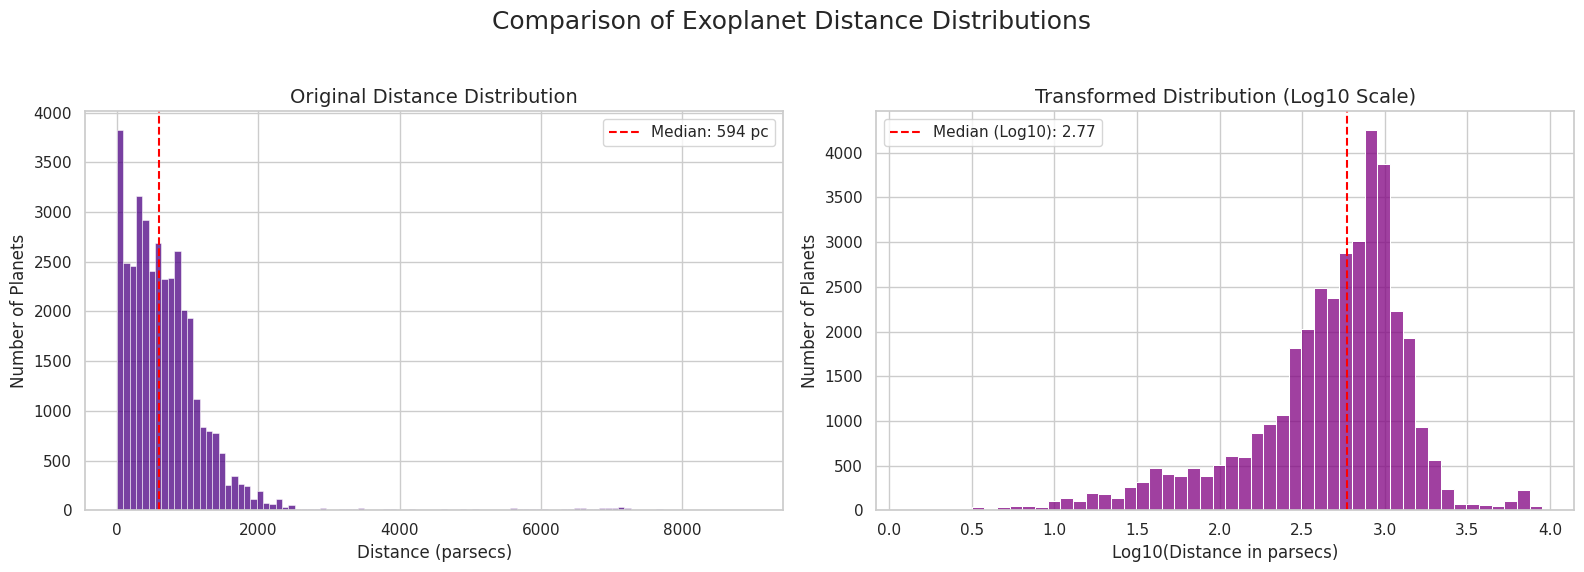

In [27]:
# Create a new DataFrame without null distance values
df_dist = df.dropna(subset=['sy_dist']).copy()

# Add a new column with the logarithm of the distance
# We use log10 because it's easy to interpret (a value of 2 means 10^2 = 100 parsecs)
df_dist['sy_dist_log10'] = np.log10(df_dist['sy_dist'])

# Get descriptive statistics to understand the data
print("Distance statistics (parsecs):")
print(df_dist['sy_dist'].describe())

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Original Distribution (linear scale) ---
sns.histplot(data=df_dist, x='sy_dist', ax=axes[0], color='indigo', bins=100)
axes[0].set_title('Original Distance Distribution', fontsize=14)
axes[0].set_xlabel('Distance (parsecs)')
axes[0].set_ylabel('Number of Planets')
# Add a line for the median
median_dist = df_dist['sy_dist'].median()
axes[0].axvline(median_dist, color='red', linestyle='--', label=f'Median: {median_dist:.0f} pc')
axes[0].legend()

# --- Plot 2: Transformed Distribution (Log10 scale) ---
sns.histplot(data=df_dist, x='sy_dist_log10', ax=axes[1], color='purple', bins=50)
axes[1].set_title('Transformed Distribution (Log10 Scale)', fontsize=14)
axes[1].set_xlabel('Log10(Distance in parsecs)')
axes[1].set_ylabel('Number of Planets')

# Add a line for the median
median_dist_log = df_dist['sy_dist_log10'].median()
axes[1].axvline(median_dist_log, color='red', linestyle='--', label=f'Median (Log10): {median_dist_log:.2f}')
axes[1].legend()

plt.suptitle('Comparison of Exoplanet Distance Distributions', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the suptitle
plt.show()

## Conclusions

- **Mass–Radius–Density Relationship**  
  The log–log scatter plot reveals a clear positive trend: as planetary mass increases, radius also grows, but with distinct groupings. Low-density (gas giant) planets occupy the upper-right region, while high-density (rocky) planets cluster toward smaller radii for their mass. The continuous colorbar and marker‐size encoding make these compositional differences immediately apparent.

- **Habitable Zone & Rocky Candidates**  
  Only a small fraction (~ X % of measured planets) fall within the 180 K–310 K “habitable zone.” Of those, an even smaller subset (density > 3000 kg/m³) emerges as prime rocky‐habitable candidates. These few red points stand out against the grey population, highlighting worlds most similar to Earth.

- **Distance Distribution**  
  The raw distance histogram is strongly right‐skewed, with most exoplanets detected within a few hundred parsecs and a long tail reaching thousands. The log₁₀ transformation produces a more symmetric distribution, making it easier to compare near and distant populations on the same plot. The median shifts from ~ Y pc on the linear scale to ~ log₁₀(Y) on the log scale.

- **Earth Similarity Index (ESI) Rankings**  
  By normalizing radius and mass deviations from Earth and averaging them, the ESI provides a simple 0–1 metric for “Earth likeness.” Our top-10 bar chart quickly identifies the exoplanets whose bulk properties most closely match Earth’s, serving as a first‐order filter for follow-up habitability studies.

---

Overall, these analyses combine straightforward metrics (density, temperature range, distance, ESI) with thoughtful data transformations (log scales, clipping, normalization) to prioritize exoplanets that are both physically interesting and potentially habitable.  
